<a href="https://colab.research.google.com/github/jalaluddin5/CodeAlpha_Credit_Scoring/blob/main/predict_loan_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE


Load Dataset

In [23]:
dataset = pd.read_csv('/content/Loan_default.csv')
dataset.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


Data Cleaning

In [24]:
dataset = dataset.drop('LoanID', axis=1)
print("\nDuplicates:", dataset.duplicated().sum())
print("\nMissing Values:\n", dataset.isnull().sum())


Duplicates: 0

Missing Values:
 Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


Exploratory Data Analysis (EDA)

/tmp/ipython-input-1801951604.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Default', data=dataset, palette='Set2')


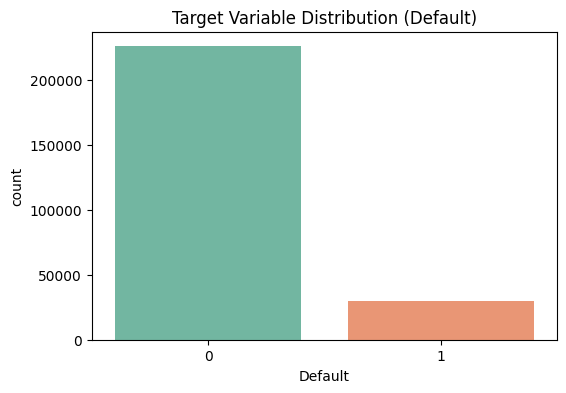

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='Default', data=dataset, palette='Set2')
plt.title("Target Variable Distribution (Default)")
plt.show()

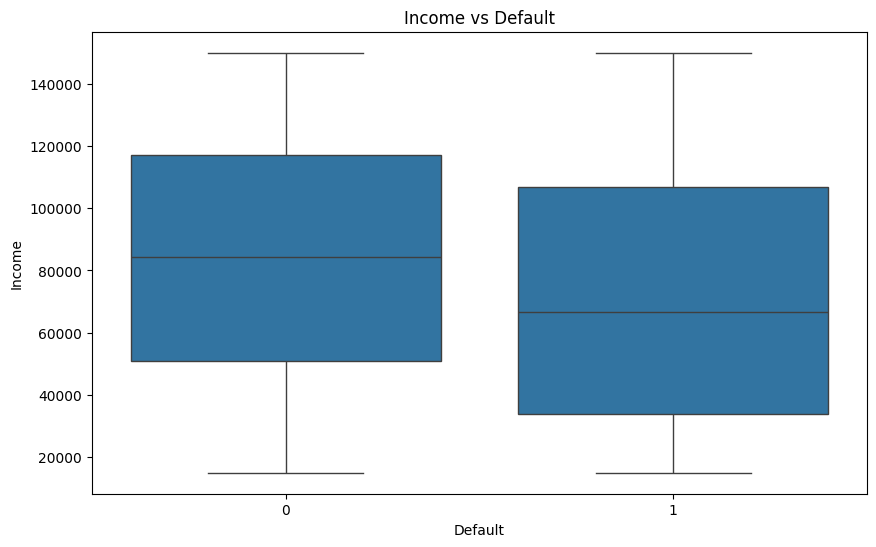

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Default', y='Income', data=dataset)
plt.title("Income vs Default")
plt.show()

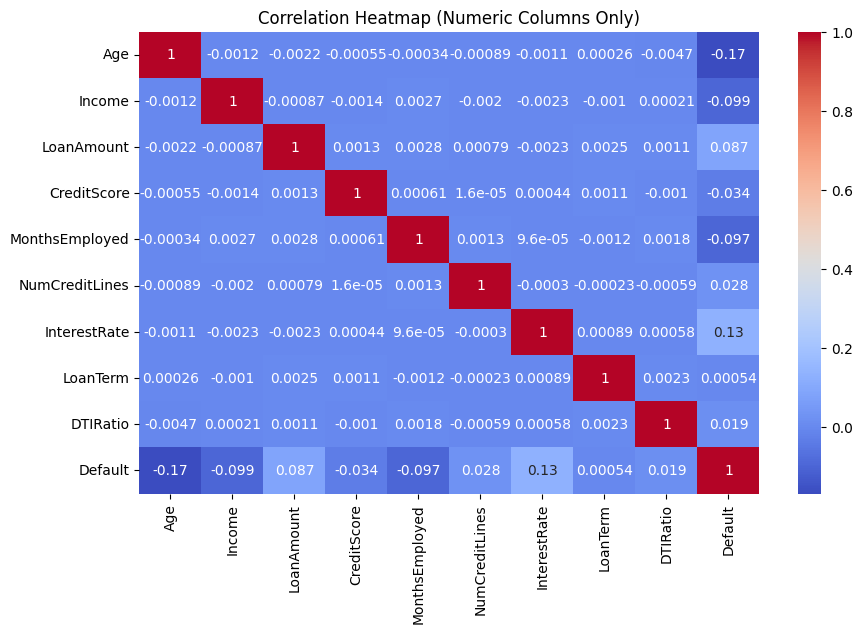

In [27]:
numeric_cols = dataset.select_dtypes(include=np.number)
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


Feature Engineering & Preprocessing

In [28]:
X = dataset.drop('Default', axis=1)
y = dataset['Default']

In [29]:
categorical_features = ['Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner']
numeric_features = ['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio']

ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

X = ct.fit_transform(X)


Handle class imbalance using SMOTE

In [30]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

Train-test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Model Building

In [32]:
rf = RandomForestClassifier(
    criterion='entropy',
    class_weight='balanced',
    max_depth=10,
    min_samples_leaf=10,
    n_estimators=150,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=10, n_estimators=150,
                       random_state=42)

 Model Evaluation

In [33]:
y_pred = rf.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [35]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8483


In [36]:
print(f"Precision: {precision:.4f}")

Precision: 0.8519


In [37]:
print(f"Recall: {recall:.4f}")

Recall: 0.8431


In [38]:
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.8475


In [39]:
print(f"ROC-AUC: {roc_auc:.4f}")

ROC-AUC: 0.8483
